In this notebook we'll analyze the plane accidents occurred from 1919 to 2023

In the dataset we have 23967 registration and 9 columns:

-date: date of the crash \
-type: type of the plane \
-registration : plane registration code \
-operator: plane's operator \
-fatalities: dead count \
-location: place of the crash \
-country \
-cat: accident category \
-year 


In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
dataset = ("aviation-accidents.csv")
df = pd.read_csv(dataset)
df

,date,type,registration,operator,fatalities,location,country,cat,year
0,date unk.,Antonov An-12B,T-1206,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
1,date unk.,Antonov An-12B,T-1204,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
2,date unk.,Antonov An-12B,T-1201,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
3,date unk.,Antonov An-12BK,NaN,Soviet AF,NaN,Tiksi Airport (IKS),Russia,A1,unknown
4,date unk.,Antonov An-12BP,CCCP-11815,Soviet AF,0,Massawa Airport ...,Eritrea,A1,unknown
...,...,...,...,...,...,...,...,...,...
23962,11-MAY-2023,Hawker 900XP,PK-LRU,Angkasa Super Services,0,Maleo Airport (MOH),Indonesia,A2,2023
23963,11-MAY-2023,Cessna 208B Grand Caravan,PK-NGA,Nasional Global Aviasi,0,Fentheik Airstrip,Indonesia,A2,2023
23964,12-MAY-2023,Cessna 208B Grand Caravan,5X-RBR,Bar Aviation,0,Kampala-Kajjansi...,Uganda,A1,2023
23965,14-MAY-2023,Boeing 747-4R7F,LX-OCV,Cargolux,0,Luxembourg-Finde...,Luxembourg,A2,2023


In [2]:
df.isnull().sum()

date               0
type               0
registration    1548
operator           4
fatalities      3938
location         948
country            0
cat                0
year               0
dtype: int64

We have a lot of missing value for the registration code, fatalities and location.
Every plane has his own registration code so is not important to know the missing code, while the number of the deaths is very important, we can fill it with the mean value to get a general idea of the total deaths, and the missing location we can fill it with unknown location.

In [3]:
df_fatalities_drop = df['fatalities'].dropna()
#in some rows we don't have a int number but a string with "n+ n" where n is a number, so we have to calculate every row:
def calculate_fatalities(fatalities):
    if '+' in fatalities:
        parts = fatalities.split('+')
        return int(parts[0]) + int(parts[1])
    else:
        return int(fatalities)
df_fatalities_drop = df_fatalities_drop.apply(calculate_fatalities)
fatalities_mean = round(df_fatalities_drop.mean())
fatalities_mean

7

we have a mean value of 7, now we can fill the missing value with the fatalities's mean

In [4]:
df_fill = df.copy()
fatalities_mean = str(fatalities_mean)
df_fill['fatalities'] = df_fill['fatalities'].fillna(fatalities_mean)
df_fill['fatalities'] = df_fill['fatalities'].apply(calculate_fatalities)
df_fill['location'] = df_fill['location'].fillna("unknown location")
df_fill['operator'] = df_fill['operator'].fillna("unknown operator")
df_fill

,date,type,registration,operator,fatalities,location,country,cat,year
0,date unk.,Antonov An-12B,T-1206,Indonesian AF,7,unknown location,Unknown country,U1,unknown
1,date unk.,Antonov An-12B,T-1204,Indonesian AF,7,unknown location,Unknown country,U1,unknown
2,date unk.,Antonov An-12B,T-1201,Indonesian AF,7,unknown location,Unknown country,U1,unknown
3,date unk.,Antonov An-12BK,NaN,Soviet AF,7,Tiksi Airport (IKS),Russia,A1,unknown
4,date unk.,Antonov An-12BP,CCCP-11815,Soviet AF,0,Massawa Airport ...,Eritrea,A1,unknown
...,...,...,...,...,...,...,...,...,...
23962,11-MAY-2023,Hawker 900XP,PK-LRU,Angkasa Super Services,0,Maleo Airport (MOH),Indonesia,A2,2023
23963,11-MAY-2023,Cessna 208B Grand Caravan,PK-NGA,Nasional Global Aviasi,0,Fentheik Airstrip,Indonesia,A2,2023
23964,12-MAY-2023,Cessna 208B Grand Caravan,5X-RBR,Bar Aviation,0,Kampala-Kajjansi...,Uganda,A1,2023
23965,14-MAY-2023,Boeing 747-4R7F,LX-OCV,Cargolux,0,Luxembourg-Finde...,Luxembourg,A2,2023


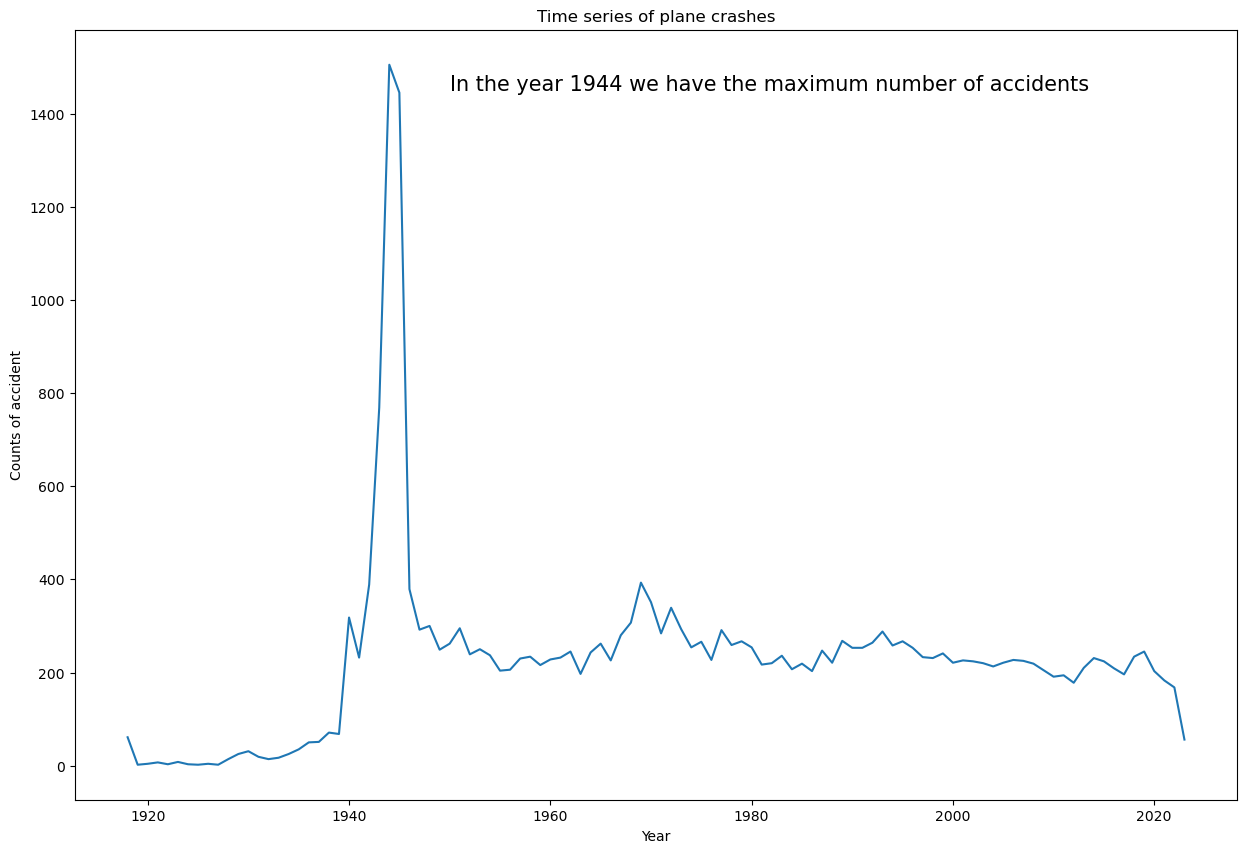

In [54]:
#we replace the "unknown" string that we have in some of our row to the year before of our starting year
df_fill['year'] = df_fill['year'].replace("unknown", 1918)
accident_count_by_year = df_fill.groupby("year").size()
plt.figure(figsize = (15, 10))
plt.plot(accident_count_by_year.index, accident_count_by_year.values)
plt.xlabel("Year")
plt.ylabel("Counts of accident")
plt.title("Time series of plane crashes")
plt.annotate("In the year 1944 we have the maximum number of accidents", xy = (1950, 1450), size = 15)
plt.show()

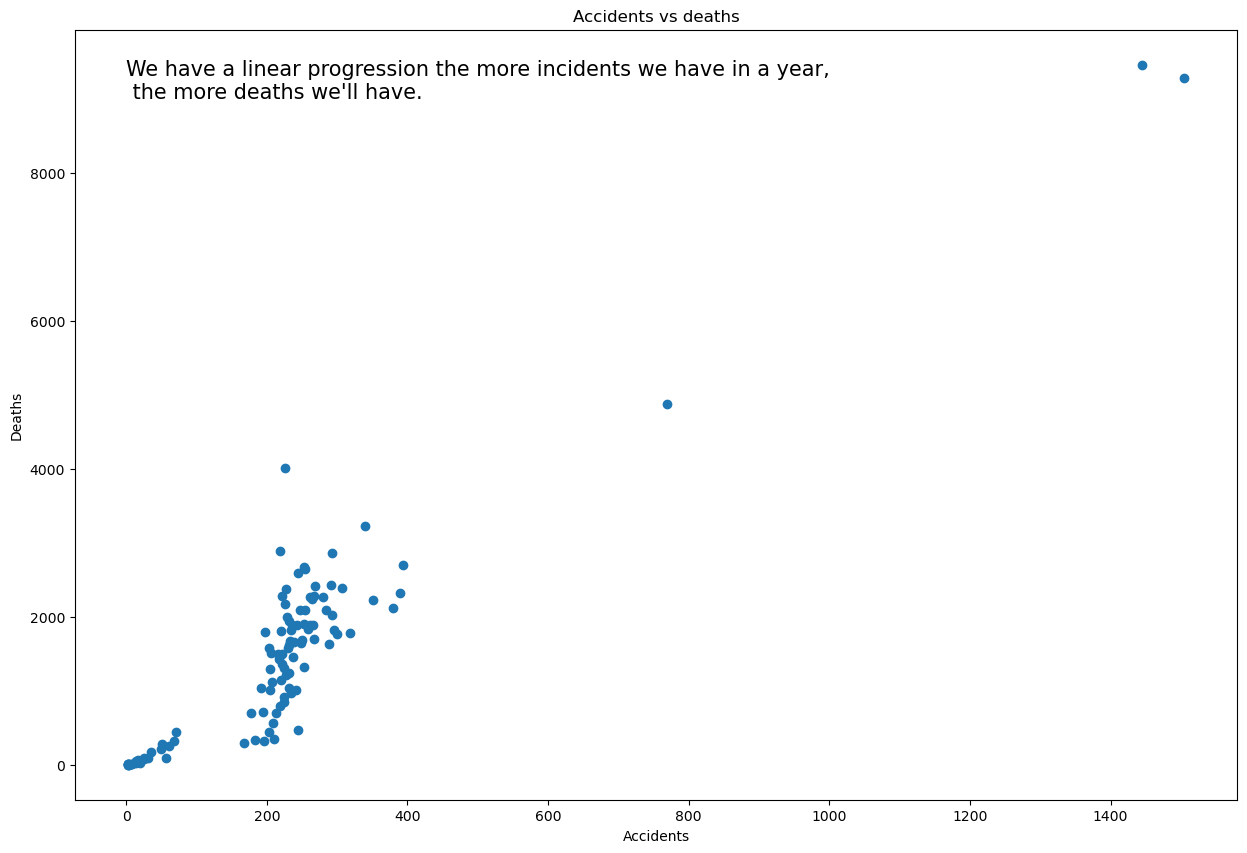

In [18]:
df_year = df_fill.groupby("year").sum('fatalities')
plt.figure(figsize = (15, 10))
plt.scatter(accident_count_by_year.values, df_year['fatalities'])
plt.xlabel("Accidents")
plt.ylabel("Deaths")
plt.title("Accidents vs deaths")
plt.annotate("We have a linear progression the more accidents we have in a year,\n the more deaths we'll have.", xy = (0,9000), size = 15)
plt.show()

We can create a map that show us accidents from every country.

To crate a map we have to install geopandas.

In [21]:
!pip install geopandas
import geopandas as gpd

  Obtaining dependency information for geopandas from https://files.pythonhosted.org/packages/27/27/2687abaa2ac02b5814e2929a5033da1e5d132c19a904dc56f77f63fd6eb9/geopandas-0.14.0-py3-none-any.whl.metadata
  Obtaining dependency information for fiona>=1.8.21 from https://files.pythonhosted.org/packages/b0/7f/2de46a2630f609b7520d74ffc7692d4969b1fa1dd3c82f62c7967183d365/Fiona-1.9.4.post1-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/50.6 kB ? eta -:--:--
     ---------------------------------------- 50.6/50.6 kB 2.5 MB/s eta 0:00:00
  Obtaining dependency information for pyproj>=3.3.0 from https://files.pythonhosted.org/packages/c8/5a/215a1894e50167d91b471d8fc413ca30034c48e5d3dfac78d12df4c840d5/pyproj-3.6.0-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
     ---------- ----------------------------- 0.4/1.4 MB 7.6 MB/s eta 0:00:01
     ------------------------ --------------- 0.8/1.4 MB 8.6 MB/

In [22]:
from mpl_toolkits.axes_grid1 import make_axes_locatable


C:\Users\matto\AppData\Local\Temp\ipykernel_36776\720834343.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<function matplotlib.pyplot.show(close=None, block=None)>

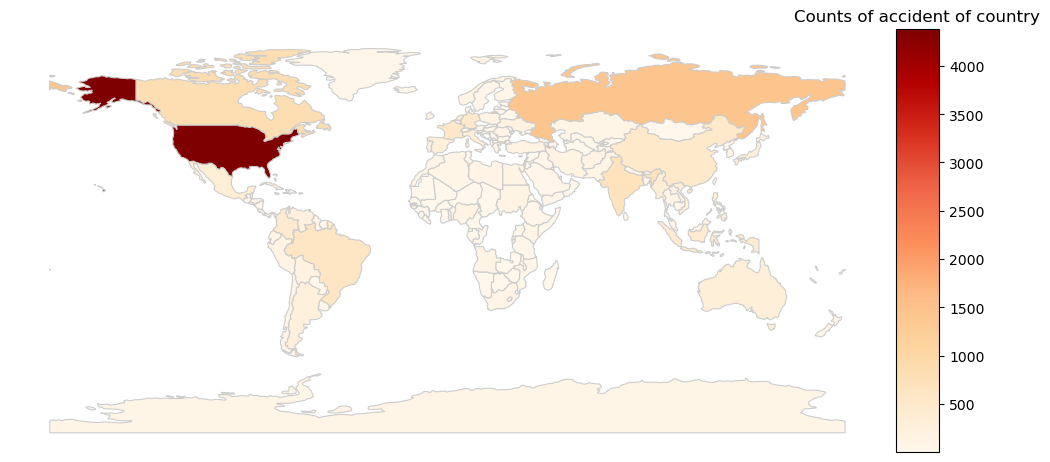

In [53]:
accident_count_by_country = df_fill['country'].value_counts().reset_index()
accident_count_by_country.columns = ['country', 'accident_count']
accident_count_by_country['country'] = accident_count_by_country['country'].replace('USA',  'United States of America' )
world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world_map = world_map[['name','geometry']]
accident_map = world_map.merge(accident_count_by_country, left_on ='name', right_on= 'country')
fig, ax = plt.subplots(figsize=(12, 8))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
accident_map.plot(column = 'accident_count', cmap='OrRd', linewidth=0.8, edgecolor='0.8', legend=True, ax=ax, cax=cax)
plt.title('Counts of accident of country')
ax.set_axis_off()
plt.show

As we can see USA has the most number of accidents among the countries, followed by Russia.

Now we can try to plot the top 10 type of plane that cuases accident.

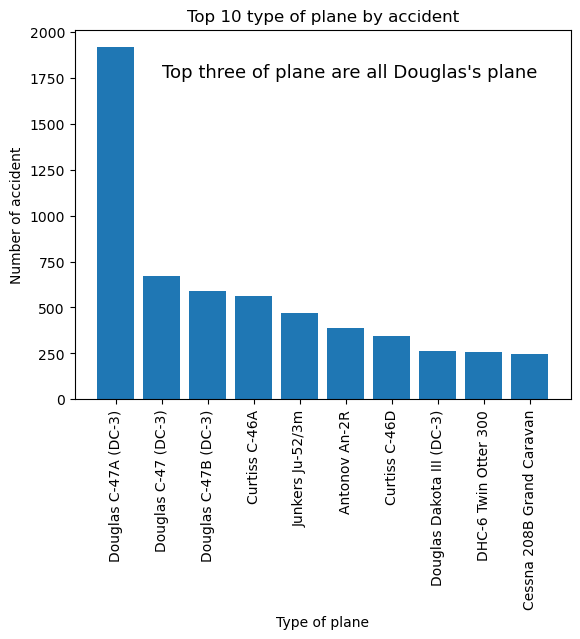

In [61]:
plane_type = df_fill['type'].value_counts().head(10)
plt.bar(plane_type.index, plane_type.values)
plt.xlabel("Type of plane")
plt.ylabel("Number of accident")
plt.title("Top 10 type of plane by accident")
plt.xticks(rotation=90)
plt.annotate("Top three of plane are all Douglas's plane", xy =('Douglas C-47 (DC-3)', 1750), size= 13 )
plt.show()

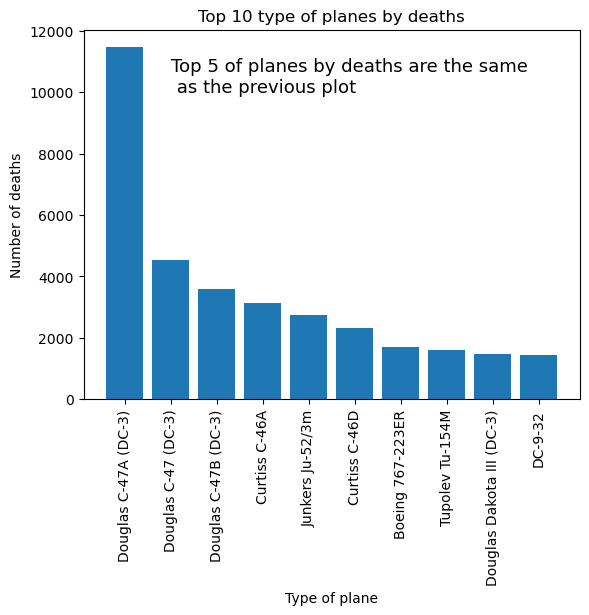

In [72]:
df_type= df_fill.groupby("type").sum('fatalities').sort_values(['fatalities'], ascending = False).head(10)
plt.bar(df_type.index, df_type['fatalities'])
plt.xlabel("Type of plane")
plt.ylabel("Number of deaths")
plt.title("Top 10 type of planes by deaths")
plt.xticks(rotation=90)
plt.annotate("Top 5 of planes by deaths are the same \n as the previous plot  ", xy =('Douglas C-47 (DC-3)', 10000), size= 13 )
plt.show()


In [104]:
df_operator_deaths = df_fill.groupby("operator").sum('fatalities')
df_operator_deaths.columns = ['fatalities']
tot_operator_deaths = df_operator_deaths.value_counts()[0]
df_operator_accidents = df_fill.groupby("operator").size()
tot_operator_accidents = df_operator_accidents.value_counts()[1]
print(f'We have a total of {tot_operator_deaths} operators with 0 deaths, while the operators with only 1 accident is only {tot_operator_accidents}.')

We have a total of 2868 operators with 0 deaths, while the operators with only 1 accident is only 4063.


In [107]:
#Calculate total deaths
tot_deaths = df_fill['fatalities'].sum()
tot_deaths

160298

In [109]:
#Calculate accidents with 0 deaths
zero_deaths = df_fill['fatalities'].value_counts()[0]
zero_deaths

10713

In [111]:
unique_operator = df_fill['operator'].nunique()
unique_operator

6018

In 94 years we have registered a total of 23967 accidents with a total of 160298 deaths, only 44.6% of the accidents caused 0 deaths, so 55.4% of the accidents caused at least 1 or more deaths. Only 2868 operators out of 6018 caused 0 deaths.

